<a href="https://colab.research.google.com/github/samriddhi448/TheSparksFoundation/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Author: Samriddhi Jain
###GRIP: The Sparks Foundation
###Role: Data Science & Business Analytics Intern
###Duration: July 2021 - August 2021
###TASK 4: Perform: Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’

# **Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Reading given dataset file**

In [ ]:
data = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='latin1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,76,94,96) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data.shape

(181691, 18)

# **Renaming columns to make it easier to read**

In [ ]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)
data = data[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]
data.head()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [ ]:
data.shape

(181691, 18)

In [ ]:
data.describe()

,Year,Month,day,latitude,longitude,kill,Wound
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


# **Checking for null data**

In [ ]:
data.isnull()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
181687,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
181688,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
181689,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [ ]:
data.isnull().sum()

Year               0
Month              0
day                0
Country            0
State            421
Region             0
City             434
latitude        4556
longitude       4557
Attacktype         0
kill           10313
Wound          16311
target1          636
summary        66129
Group              0
Targettype         0
Weapon             0
motive        131130
dtype: int64

# **Cleaning data by removing currupt values**

In [ ]:
data['day']=data['day'].fillna(value=data['day'].pad())
data['Country']=data['Country'].fillna(value=data['Country'].pad())
data['State']=data['State'].fillna(value=data['State'].pad())
data['Region']=data['Region'].fillna(value=data['Region'].pad())
data['City']=data['City'].fillna(value=data['City'].pad())
data['latitude']=data['latitude'].fillna(value=data['latitude'].mean())
data['longitude']=data['longitude'].fillna(value=data['longitude'].mean())
data['Attacktype']=data['Attacktype'].fillna(value=data['Attacktype'].pad())
data['Wound'] = data['Wound'].fillna(0)
data['kill'] = data['kill'].fillna(0)

"data['day']=data['day'].fillna(value=data['day'].pad())\ndata['Country']=data['Country'].fillna(value=data['Country'].pad())\ndata['State']=data['State'].fillna(value=data['State'].pad())\ndata['Region']=data['Region'].fillna(value=data['Region'].pad())\ndata['City']=data['City'].fillna(value=data['City'].pad())\ndata['latitude']=data['latitude'].fillna(value=data['latitude'].mean())\ndata['longitude']=data['longitude'].fillna(value=data['longitude'].mean())\ndata['Attacktype']=data['Attacktype'].fillna(value=data['Attacktype'].pad())\ndata['Wound'] = data['Wound'].fillna(0)\ndata['kill'] = data['kill'].fillna(0)"

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        181691 non-null  int64  
 1   Month       181691 non-null  int64  
 2   day         181691 non-null  int64  
 3   Country     181691 non-null  object 
 4   State       181270 non-null  object 
 5   Region      181691 non-null  object 
 6   City        181257 non-null  object 
 7   latitude    177135 non-null  float64
 8   longitude   177134 non-null  float64
 9   Attacktype  181691 non-null  object 
 10  kill        171378 non-null  float64
 11  Wound       165380 non-null  float64
 12  target1     181055 non-null  object 
 13  summary     115562 non-null  object 
 14  Group       181691 non-null  object 
 15  Targettype  181691 non-null  object 
 16  Weapon      181691 non-null  object 
 17  motive      50561 non-null   object 
dtypes: float64(4), int64(3), object(11)
memory u

# ***Visual Analysis***

# **Nunber of people killed by each attack type**

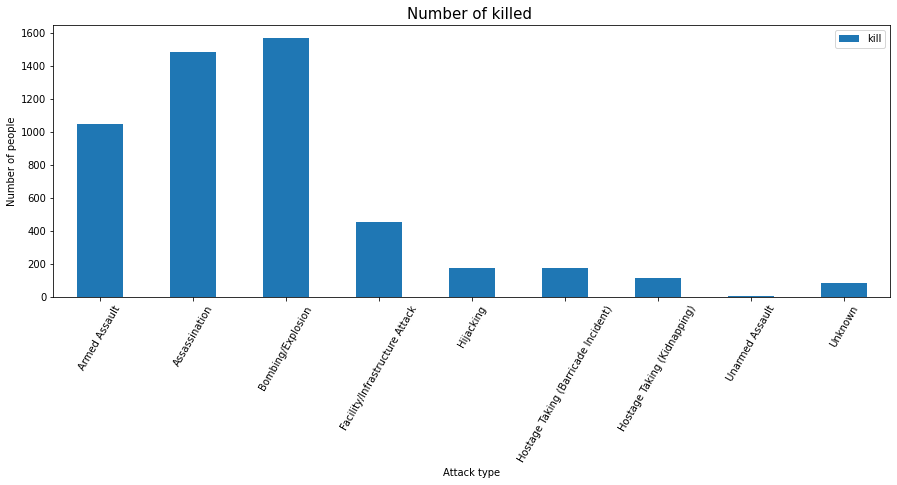

In [ ]:
data[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(15,5))
plt.xticks(rotation=60)
plt.title("Number of killed ",fontsize=15)
plt.ylabel('Number of people',fontsize=10)
plt.xlabel('Attack type',fontsize=10)
plt.show()

# **Comparision of number of Attacks and Kills**

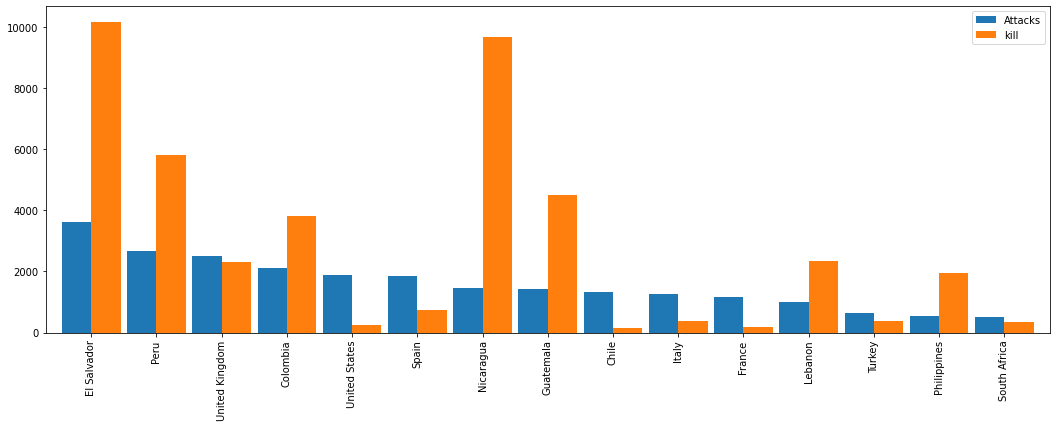

In [ ]:
count=df['Country'].value_counts()[:15].to_frame()
count.columns=['Attacks']
data=df.groupby('Country')['kill'].sum().to_frame()
count.merge(data,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

# **Terrorist activities by region each year**

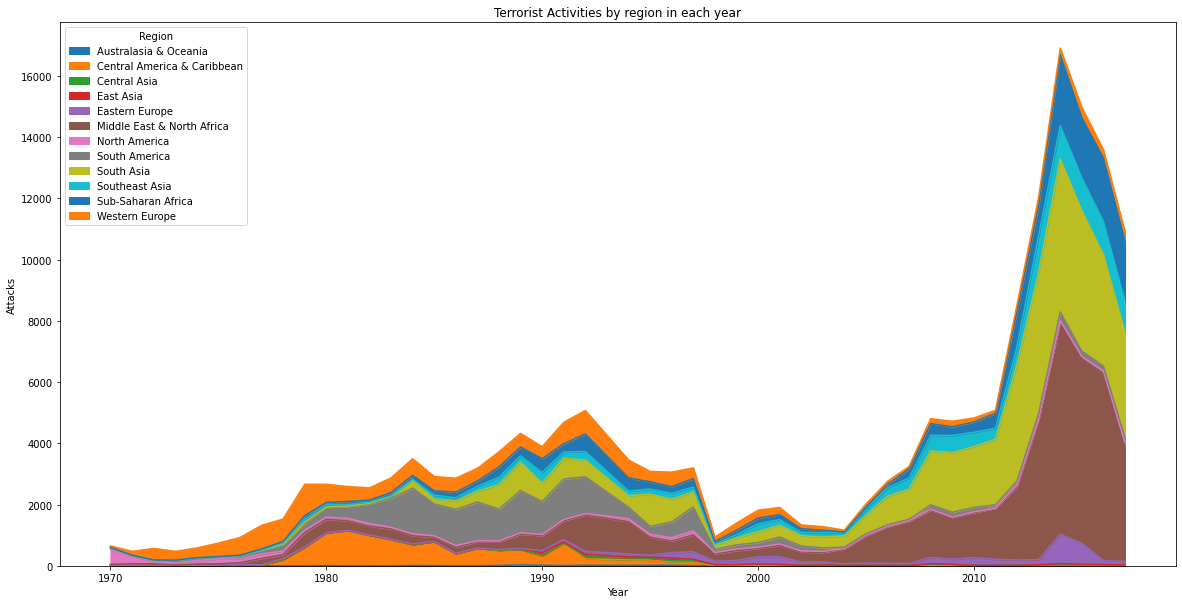

In [ ]:
df_region=pd.crosstab(df.Year,df.Region).plot(kind='area',figsize=(20,10))
plt.title('Terrorist Activities by region in each year')
plt.ylabel('Attacks')
plt.show()

# **2014 had the most Terrorist Activities**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


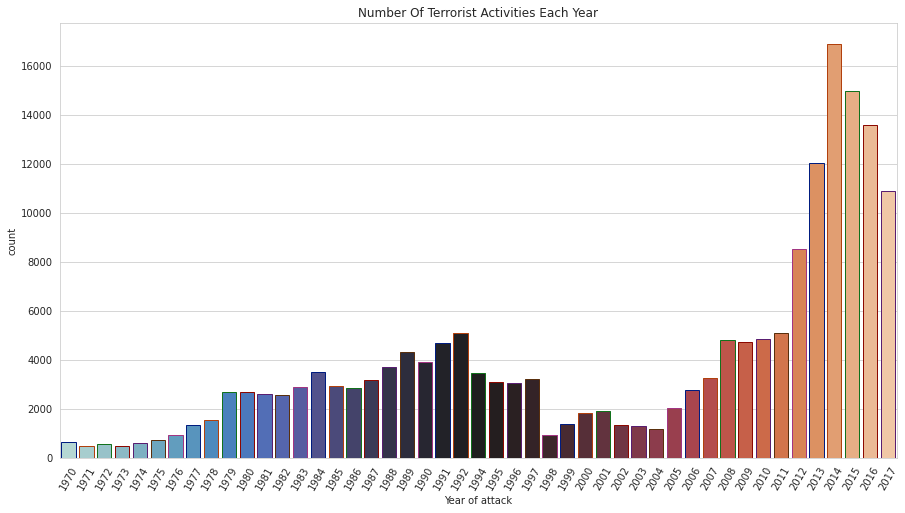

In [ ]:
plt.subplots(figsize=(15,8))
sns.countplot('Year',data=df,palette='icefire',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=60)
plt.xlabel('Year of attack')
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

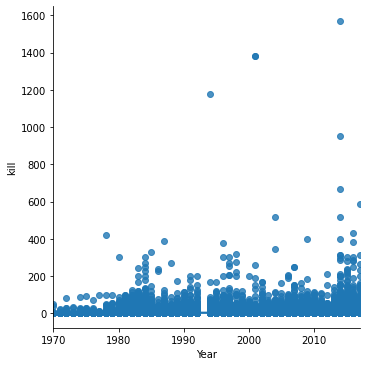

In [ ]:
sns.lmplot(x='Year',y='kill',data=df,fit_reg=True,legend=True,palette="red")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


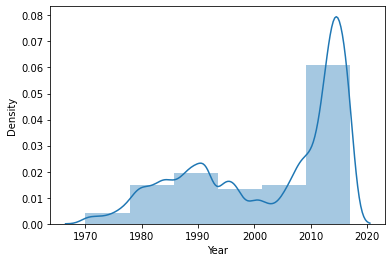

In [ ]:
sns.distplot(data['Year'], bins=6)

# **Analysis using Heatmaps**

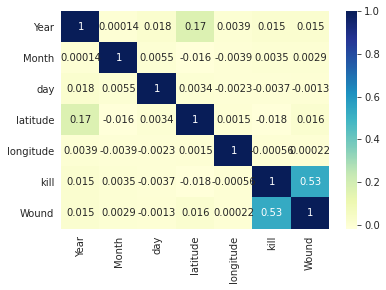

In [ ]:
corr = data.corr()
sns.heatmap(corr,cmap='YlGnBu',annot=True)

# **June had the most Attacks**

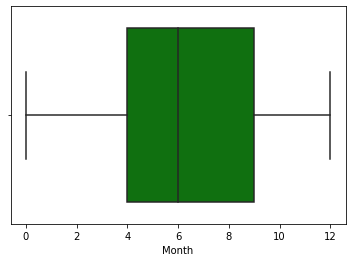

In [ ]:
sns.boxplot(x ='Month', data=data, color="green")

# **Top 10 most affected Cities**

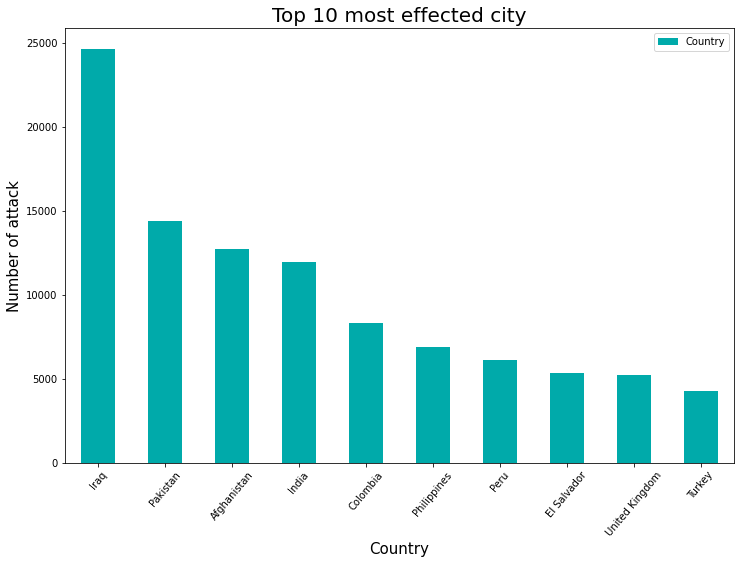

In [ ]:
data['Country'].value_counts().to_frame().sort_values('Country',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(12,8),color='#00AAAA')
plt.xticks(rotation = 50)
plt.xlabel("Country",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Top 10 most affected cities",fontsize=20)
plt.show()

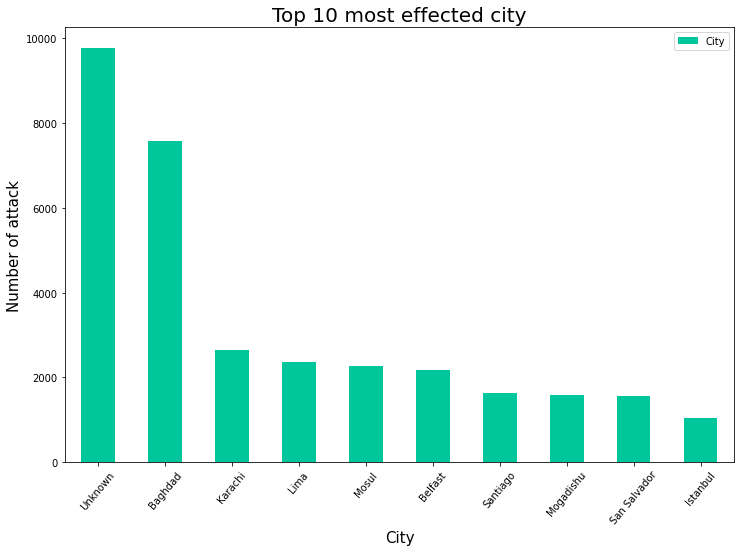

In [ ]:
data['City'].value_counts().to_frame().sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(12,8),color='#00C69C')
plt.xticks(rotation = 50)
plt.xlabel("City",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Top 10 most effected city",fontsize=20)
plt.show()

# **Top 10 most Harmful Terrorist Groups**

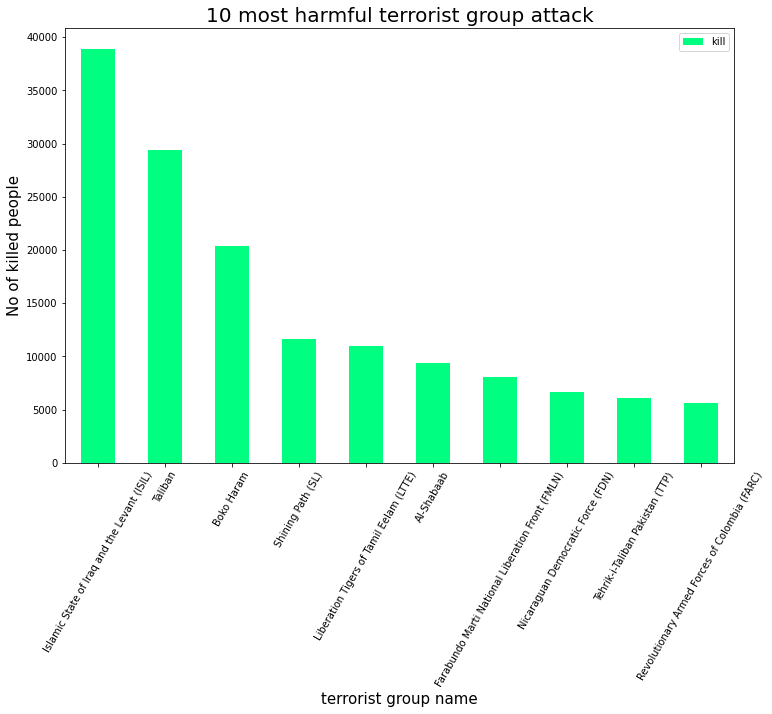

In [ ]:
data[['Group','kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('kill',ascending=False).head(10).plot(kind='bar',color='#00FF80',figsize=(12,8))
plt.title("10 most harmful terrorist group attack",fontsize=20)
plt.xticks(rotation=60)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("No of killed people",fontsize=15)
plt.show()

# **Eastern Europe in 2017 had the most casualities**

Text(0, 0.5, 'Casualities')

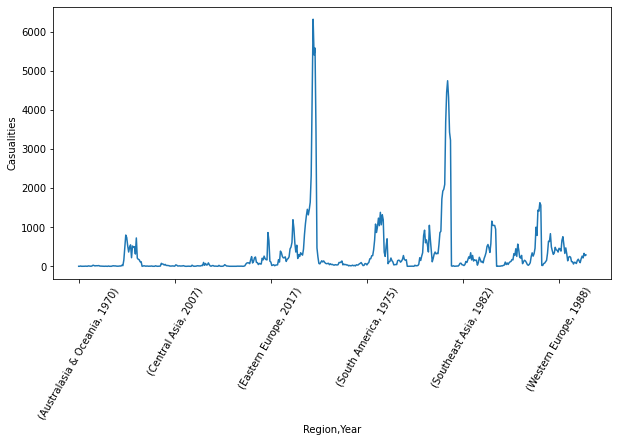

In [ ]:
data['casualities']=data['kill']+data['Wound']
plt.subplots(figsize=(10,5))
data.groupby(['Region', 'Year']).count()['casualities'].plot()
plt.xticks(rotation=60)
plt.ylabel("Casualities")